In [5]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv("/content/spam.csv", encoding="ISO-8859-1")

In [7]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
#Drop empty columns
cols = [2,3,4]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
#Rename columns as category and message
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:

print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5572 E-Mails.


In [11]:

df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


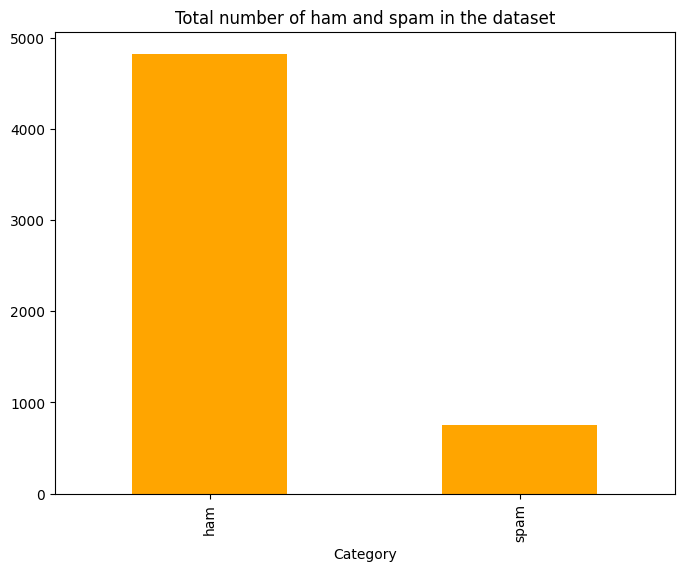

In [12]:

plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

Text(0.5, 1.0, 'Ham Word Cloud')

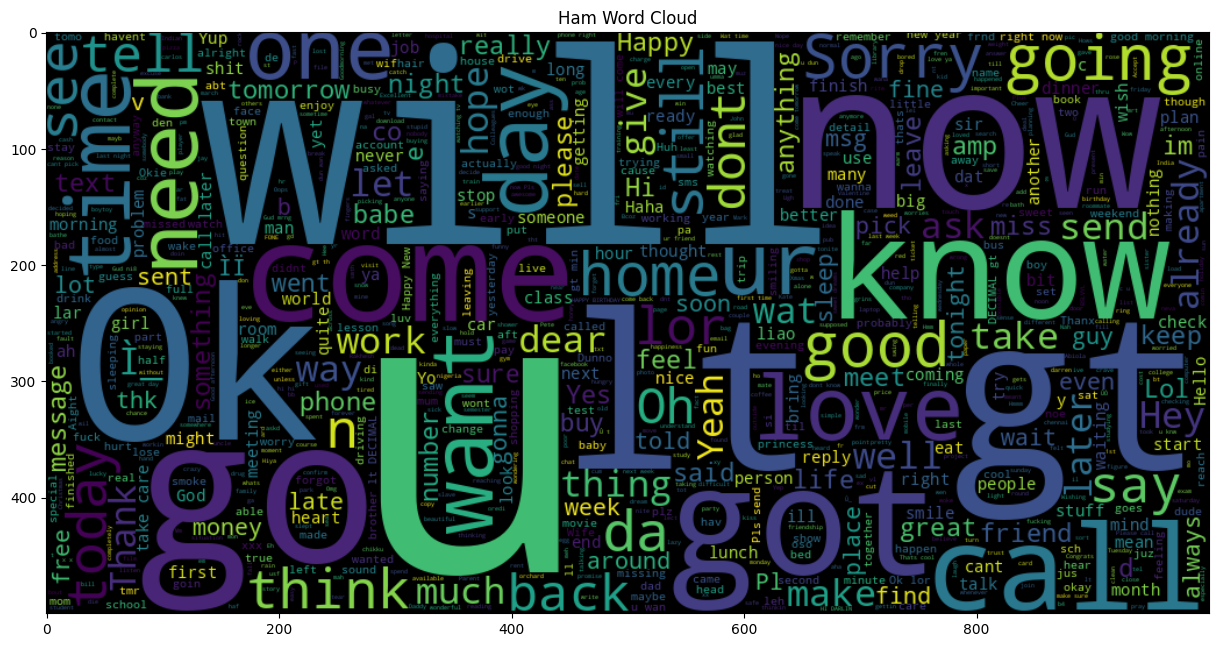

In [13]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="ham" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

Text(0.5, 1.0, 'Spam Word Cloud')

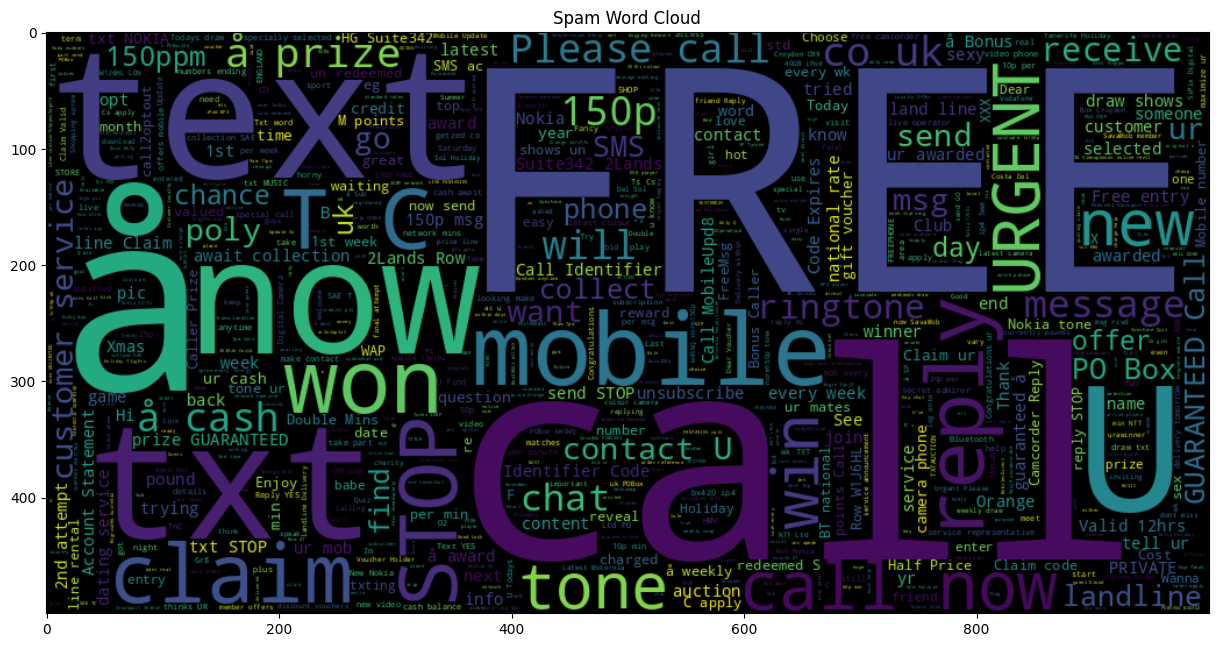

In [14]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="spam" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

In [15]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
X=df['Message']
Y=df['Category']

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [18]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [19]:
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [20]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [21]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9899497487437185

In [22]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])

In [23]:
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [24]:
y_pred_SVM=clf_svm.predict(X_test)


In [25]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc


0.9877961234745154

In [26]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [27]:

clf_knn.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [28]:
y_pred_KNN=clf_knn.predict(X_test)


In [29]:
knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

0.9289303661162958

In [30]:
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [31]:

clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [32]:
y_pred_DT=clf_DecisionTree.predict(X_test)

In [33]:

dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.968413496051687

In [34]:
clf_rf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [35]:
clf_rf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [36]:
y_pred_RF=clf_rf.predict(X_test)

In [37]:
rf_acc=accuracy_score(y_test,y_pred_RF)
rf_acc

0.9806173725771715

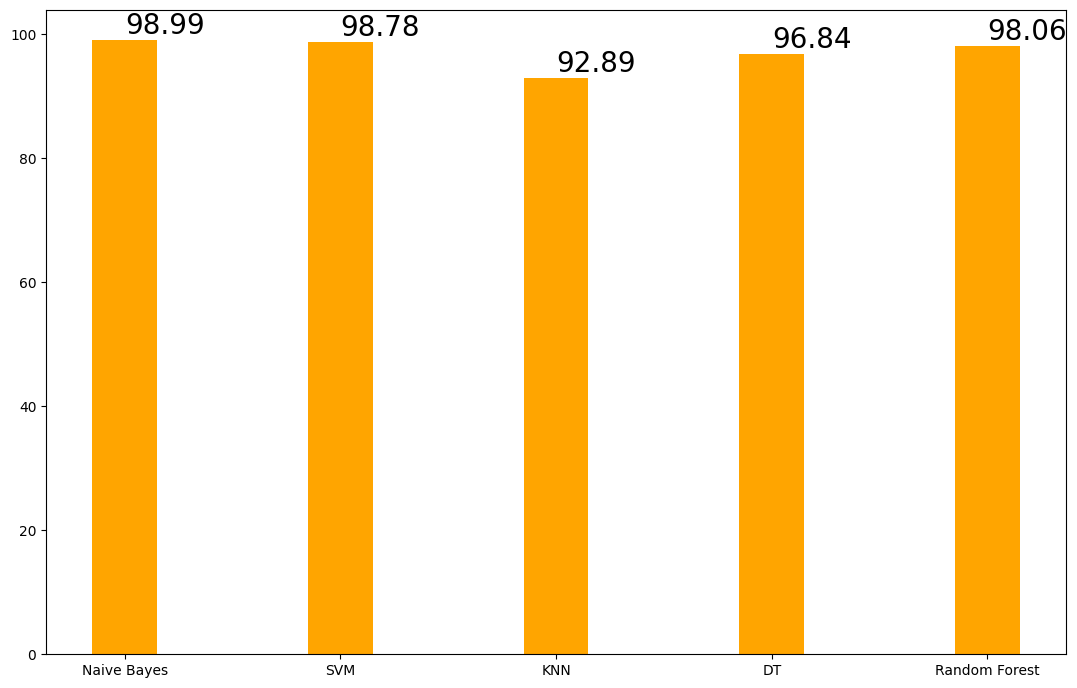

In [38]:
menMeans = np.array([naive_acc,svm_acc,knn_acc,dt_acc,rf_acc])*100
ind = ['Naive Bayes','SVM','KNN','DT','Random Forest']
fig, ax = plt.subplots(figsize = (11,7))
ax.bar(ind,menMeans,width=0.3,color ='orange')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

In [39]:

#if you do not want to know whic algorithm makes predict remove "{clf[1]}"

def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print(f"{clf[1]} This is a Spam email \n")
    else:
        print(f"{clf[1]} This is a Real email \n")

In [40]:

message= input()

KeyboardInterrupt: Interrupted by user

In [ ]:
clf_1 = clf_NaiveBaised
clf_2 = clf_svm
clf_3 = clf_knn
clf_4 = clf_DecisionTree
clf_5 = clf_rf
i = [clf_1, clf_2,clf_3,clf_4,clf_5]
for x in i:
    spam_dect(x,message)

In [ ]:

#Let's make a predict with Naive Bayes
spam_dect(clf_NaiveBaised, message)